## Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import os

In [5]:
# Load the dataset
data = pd.read_csv(os.path.join(os.getcwd() , 'datasets' , 'heart.csv'))
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,OldPeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   OldPeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
OldPeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [9]:
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   OldPeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


In [11]:
data.shape

(918, 12)

In [13]:
data.isnull().sum().sum()

0

In [15]:
data.duplicated().sum()

0

In [14]:
# remove outliers
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
data.shape

(587, 12)

## preprocessing

In [16]:
X=data.drop(columns="HeartDisease", axis=1)
y=data["HeartDisease"]

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler

stdS=StandardScaler()
x_train_scaled=stdS.fit_transform(x_train)
x_test_scaled=stdS.transform(x_test)

# **SVM MODEL**

In [19]:
from sklearn.svm import SVC
svc_model=SVC(kernel='rbf',C=1)
svc_model.fit(x_train_scaled,y_train)

SVC(C=1)

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
scores4svm=cross_val_score(svc_model,x_train_scaled,y_train,cv=5)
print(scores4svm.mean())
y_pred=svc_model.predict(x_test_scaled)
print(accuracy_score(y_test,y_pred)*100)
confusion_matrix(y_test,y_pred)

0.863623884694578
83.05084745762711


array([[58, 13],
       [ 7, 40]], dtype=int64)

# **BAGGING WITH SVM**

In [21]:
from sklearn.ensemble import BaggingClassifier
bag_modelSVC=BaggingClassifier(estimator=SVC(),n_estimators=100,max_samples=0.8,oob_score=True,random_state=0)
bag_modelSVC.fit(x_train_scaled,y_train)


BaggingClassifier(estimator=SVC(), max_samples=0.8, n_estimators=100,
                  oob_score=True, random_state=0)

In [ ]:
y_pred4bag=bag_modelSVC.predict(x_test_scaled)
print(accuracy_score(y_test,y_pred4bag)*100)
confusion_matrix(y_test,y_pred4bag)


83.05084745762711


array([[59, 12],
       [ 8, 39]], dtype=int64)

## **DECESTION TREE CLASSIFIER**

In [23]:
from sklearn.tree import DecisionTreeClassifier
decesion=DecisionTreeClassifier()
decesion.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [24]:
y_pred4decesion=decesion.predict(x_test_scaled)
print(accuracy_score(y_test,y_pred4decesion)*100)
confusion_matrix(y_test,y_pred4decesion)

73.72881355932203


array([[55, 16],
       [15, 32]], dtype=int64)

## **DECESTION TREE CLASSIFIER WITH BAGGING**

In [25]:
bag_model=BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=100,max_samples=0.8,oob_score=True,random_state=0)
bag_model.fit(x_train_scaled,y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=0)

In [26]:
y_pred4bagt=bag_model.predict(x_test_scaled)
print(accuracy_score(y_test,y_pred4bagt)*100)
confusion_matrix(y_test,y_pred4bagt)


78.8135593220339


array([[55, 16],
       [ 9, 38]], dtype=int64)

## **RANDOM FOREST**

In [27]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier()
model_forest.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [28]:
y_pred4forest = model_forest.predict(x_test_scaled)

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred4forest) * 100:.2f}%")


Accuracy: 84.75%


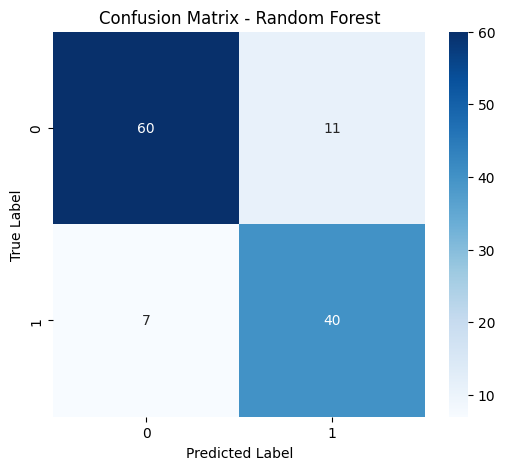

In [29]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred4forest)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
